In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from collections import Counter
import re

# Sample text data
text = """According to all known laws of aviation, there is no way a bee should be able to fly.
Its wings are too small to get its fat little body off the ground.
The bee, of course, flies anyway because bees don't care what humans think is impossible.
Yellow, black. Yellow, black. Yellow, black. Yellow, black.
Ooh, black and yellow!
Let's shake it up a little.
Barry! Breakfast is ready!
Coming!
Hang on a second.
Hello?
Barry?
Adam?
Can you believe this is happening?
I can't.
I'll pick you up.
Looking sharp.
Use the stairs, Your father paid good money for those.
Sorry. I'm excited.
Here's the graduate.
We're very proud of you, son.
A perfect report card, all B's.
Very proud.
Ma! I got a thing going here.
You got lint on your fuzz.
Ow! That's me!
Wave to us! We'll be in row 118,000.
Bye!
Barry, I told you, stop flying in the house!
Hey, Adam.
Hey, Barry.
Is that fuzz gel?
A little. Special day, graduation.
Never thought I'd make it.
Three days grade school, three days high school.
Those were awkward.
Three days college. I'm glad I took a day and hitchhiked around The Hive.
You did come back different.
Hi, Barry. Artie, growing a mustache? Looks good.
Hear about Frankie?
Yeah.
You going to the funeral?
No, I'm not going.
Everybody knows, sting someone, you die.
Don't waste it on a squirrel.
Such a hothead.
I guess he could have just gotten out of the way.
I love this incorporating an amusement park into our day.
That's why we don't need vacations.
Boy, quite a bit of pomp under the circumstances.
Well, Adam, today we are men.
We are!
Bee-men.
Amen!
Hallelujah!
Students, faculty, distinguished bees,
please welcome Dean Buzzwell.
Welcome, New Hive City graduating class of 9:15.
That concludes our ceremonies And begins your career at Honex Industries!
Will we pick our job today?
I heard it's just orientation.
Heads up! Here we go.
Keep your hands and antennas inside the tram at all times.
Wonder what it'll be like?
A little scary.
Welcome to Honex, a division of Honesco and a part of the Hexagon Group.
This is it!
Wow.
Wow.
We know that you, as a bee, have worked your whole life to get to the point where you can work for your whole life.
Honey begins when our valiant Pollen Jocks bring the nectar to The Hive.
Our top-secret formula is automatically color-corrected, scent-adjusted and bubble-contoured into this soothing sweet syrup with its distinctive golden glow you know as... Honey!
That girl was hot.
She's my cousin!
She is?
Yes, we're all cousins.
Right. You're right.
At Honex, we constantly strive to improve every aspect of bee existence.
These bees are stress-testing a new helmet technology.
What do you think he makes?
Not enough.
Here we have our latest advancement, the Krelman.
What does that do?
Catches that little strand of honey that hangs after you pour it.
Saves us millions.
Can anyone work on the Krelman?
Of course. Most bee jobs are small ones.
But bees know that every small job, if it's done well, means a lot.
But choose carefully because you'll stay in the job you pick for the rest of your life.
The same job the rest of your life? I didn't know that.
What's the difference?
You'll be happy to know that bees, as a species, haven't had one day off in 27 million years.
So you'll just work us to death?
We'll sure try.
Wow! That blew my mind!
"What's the difference?"
How can you say that?
One job forever?
That's an insane choice to have to make.
I'm relieved. Now we only have to make one decision in life.
But, Adam, how could they never have told us that?
Why would you question anything? We're bees.
We're the most perfectly functioning society on Earth.
You ever think maybe things work a little too well here?
Like what? Give me one example.
I don't know. But you know what I'm talking about.
Please clear the gate. Royal Nectar Force on approach.
Wait a second. Check it out.
Hey, those are Pollen Jocks!
Wow.
I've never seen them this close.
They know what it's like outside The Hive.
Yeah, but some don't come back.
Hey, Jocks!
Hi, Jocks!
You guys did great!
You're monsters!
You're sky freaks! I love it! I love it!
I wonder where they were.
I don't know.
Their day's not planned.
Outside The Hive, flying who knows where, doing who knows what.
You can't just decide to be a Pollen Jock. You have to be bred for that.
Right.
Look. That's more pollen than you and I will see in a lifetime.
It's just a status symbol.
Bees make too much of it.
Perhaps. Unless you're wearing it and the ladies see you wearing it.
Those ladies?
Aren't they our cousins too?
Distant. Distant.
Look at these two.
Couple of Hive Harrys.
Let's have fun with them.
It must be dangerous being a Pollen Jock.
Yeah. Once a bear pinned me against a mushroom!
He had a paw on my throat, and with the other, he was slapping me!
Oh, my!
I never thought I'd knock him out.
What were you doing during this?
Trying to alert the authorities.
I can autograph that.
A little gusty out there today, wasn't it, comrades?
Yeah. Gusty.
We're hitting a sunflower patch six miles from here tomorrow.
Six miles, huh?
Barry!
A puddle jump for us, but maybe you're not up for it.
Maybe I am.
You are not!
We're going 0900 at J-Gate.
What do you think, buzzy-boy?
Are you bee enough?
I might be. It all depends on what 0900 means.
Hey, Honex!
Dad, you surprised me.
You decide what you're interested in?
Well, there's a lot of choices.
But you only get one.
Do you ever get bored doing the same job every day?
Son, let me tell you about stirring.
You grab that stick, and you just move it around, and you stir it around.
You get yourself into a rhythm.
It's a beautiful thing.
You know, Dad, the more I think about it,
maybe the honey field just isn't right for me.
You were thinking of what, making balloon animals?
That's a bad job for a guy with a stinger.
Janet, your son's not sure he wants to go into honey!
Barry, you are so funny sometimes.
I'm not trying to be funny.
You're not funny! You're going into honey. Our son, the stirrer!
You're gonna be a stirrer?
No one's listening to me!
Wait till you see the sticks I have.
I could say anything right now.
I'm gonna get an ant tattoo!
Let's open some honey and celebrate!
Maybe I'll pierce my thorax. Shave my antennae. Shack up with a grasshopper. Get a gold tooth and call everybody "dawg"!
I'm so proud.
We're starting work today!
Today's the day.
Come on! All the good jobs will be gone.
Yeah, right.
Pollen counting, stunt bee, pouring, stirrer, front desk, hair removal...
Is it still available?
Hang on. Two left!
One of them's yours! Congratulations!
Step to the side.
What'd you get?
Picking crud out. Stellar!
Wow!
Couple of newbies?
Yes, sir! Our first day! We are ready!
Make your choice.
You want to go first?
No, you go.
Oh, my. What's available?
Restroom attendant's open, not for the reason you think.
Any chance of getting the Krelman?
Sure, you're on.
I'm sorry, the Krelman just closed out.
Wax monkey's always open.
The Krelman opened up again.
What happened?
A bee died. Makes an opening. See? He's dead. Another dead one.
Deady. Deadified. Two more dead.
Dead from the neck up. Dead from the neck down. That's life!
Oh, this is so hard!
Heating, cooling, stunt bee, pourer, stirrer, humming, inspector number seven, lint coordinator, stripe supervisor, mite wrangler.
Barry, what do you think I should... Barry?
Barry!
All right, we've got the sunflower patch in quadrant nine...
What happened to you?
Where are you?
I'm going out.
Out? Out where?
Out there.
Oh, no!
I have to, before I go to work for the rest of my life.
You're gonna die! You're crazy! Hello?
Another call coming in.
If anyone's feeling brave, there's a Korean deli on 83rd that gets their roses today.
Hey, guys.
Look at that.
Isn't that the kid we saw yesterday?
Hold it, son, flight deck's restricted.
It's OK, Lou. We're gonna take him up.
Really? Feeling lucky, are you?
Sign here, here. Just initial that.
Thank you.
OK.
You got a rain advisory today, and as you all know, bees cannot fly in rain.
So be careful. As always, watch your brooms, hockey sticks, dogs, birds, bears and bats.
Also, I got a couple of reports of root beer being poured on us.
Murphy's in a home because of it, babbling like a cicada!
That's awful.
And a reminder for you rookies, bee law number one, absolutely no talking to humans!
 All right, launch positions!
Buzz, buzz, buzz, buzz! Buzz, buzz, buzz, buzz! Buzz, buzz, buzz, buzz!
Black and yellow!
Hello!
You ready for this, hot shot?
Yeah. Yeah, bring it on.
Wind, check.
Antennae, check.
Nectar pack, check.
Wings, check.
Stinger, check.
Scared out of my shorts, check.
OK, ladies,
let's move it out!
Pound those petunias, you striped stem-suckers!
All of you, drain those flowers!
Wow! I'm out!
I can't believe I'm out!
So blue.
I feel so fast and free!
Box kite!
Wow!
Flowers!
This is Blue Leader, We have roses visual.
Bring it around 30 degrees and hold.
Roses!
30 degrees, roger. Bringing it around.
Stand to the side, kid.
It's got a bit of a kick.
That is one nectar collector!
Ever see pollination up close?
No, sir.
I pick up some pollen here, sprinkle it over here. Maybe a dash over there, a pinch on that one.
See that? It's a little bit of magic.
That's amazing. Why do we do that?
That's pollen power. More pollen, more flowers, more nectar, more honey for us.
Cool.
I'm picking up a lot of bright yellow, Could be daisies, Don't we need those?
Copy that visual.
Wait. One of these flowers seems to be on the move.
Say again? You're reporting a moving flower?
Affirmative.
That was on the line!
This is the coolest. What is it?
I don't know, but I'm loving this color.
It smells good.
Not like a flower, but I like it.
Yeah, fuzzy.
Chemical-y.
Careful, guys. It's a little grabby.
My sweet lord of bees!
Candy-brain, get off there!
Problem!
Guys!
This could be bad.
Affirmative.
Very close.
Gonna hurt.
Mama's little boy.
You are way out of position, rookie!
Coming in at you like a missile!
Help me!
I don't think these are flowers.
Should we tell him?
I think he knows.
What is this?!
Match point!
You can start packing up, honey, because you're about to eat it!
Yowser!
Gross.
There's a bee in the car!
Do something!
I'm driving!
Hi, bee.
He's back here!
He's going to sting me!
Nobody move. If you don't move, he won't sting you. Freeze!
He blinked!
Spray him, Granny!
What are you doing?!
Wow... the tension level out here is unbelievable.
I gotta get home.
Can't fly in rain. Can't fly in rain. Can't fly in rain.
Mayday! Mayday! Bee going down!
Ken, could you close the window please?
Ken, could you close the window please?
Check out my new resume. I made it into a fold-out brochure. You see? Folds out.
Oh, no. More humans. I don't need this.
What was that?
Maybe this time. This time. This time. This time! This time! This... Drapes!
That is diabolical.
It's fantastic. It's got all my special skills, even my top-ten favorite movies.
What's number one? Star Wars?
Nah, I don't go for that... kind of stuff.
No wonder we shouldn't talk to them. They're out of their minds.
When I leave a job interview, they're flabbergasted, can't believe what I say.
There's the sun. Maybe that's a way out.
I don't remember the sun having a big 75 on it.
I predicted global warming. I could feel it getting hotter. At first I thought it was just me.
Wait! Stop! Bee!
Stand back. These are winter boots.
Wait!
Don't kill him!
You know I'm allergic to them! This thing could kill me!
Why does his life have less value than yours?
Why does his life have any less value than mine? Is that your statement?
I'm just saying all life has value. You don't know what he's capable of feeling.
My brochure!
There you go, little guy.
I'm not scared of him.It's an allergic thing.
 Put that on your resume brochure.
My whole face could puff up.
Make it one of your special skills.
Knocking someone out is also a special skill.
Right. Bye, Vanessa. Thanks.
Vanessa, next week? Yogurt night?
Sure, Ken. You know, whatever.
You could put carob chips on there.
Bye.
Supposed to be less calories.
Bye.
I gotta say something. She saved my life. I gotta say something.
All right, here it goes.
Nah.
What would I say?
I could really get in trouble. It's a bee law. You're not supposed to talk to a human.
I can't believe I'm doing this. I've got to.
Oh, I can't do it. Come on!
No. Yes. No. Do it. I can't.
How should I start it? "You like jazz?" No, that's no good.
Here she comes! Speak, you fool!
Hi!
I'm sorry. You're talking.
Yes, I know.
You're talking!
I'm so sorry.
No, it's OK. It's fine.
I know I'm dreaming. But I don't recall going to bed.
Well, I'm sure this is very disconcerting.
This is a bit of a surprise to me. I mean, you're a bee!
I am. And I'm not supposed to be doing this, but they were all trying to kill me.
And if it wasn't for you... I had to thank you. It's just how I was raised.
That was a little weird. I'm talking with a bee.
Yeah.
I'm talking to a bee. And the bee is talking to me!
I just want to say I'm grateful.
I'll leave now.
Wait! How did you learn to do that?
What?
The talking thing.
Same way you did, I guess. "Mama, Dada, honey." You pick it up.
That's very funny.
Yeah.
Bees are funny. If we didn't laugh, we'd cry with what we have to deal with.
Anyway... Can I... get you something?
Like what?
I don't know. I mean... I don't know. Coffee?
I don't want to put you out.
It's no trouble. It takes two minutes.
It's just coffee.
I hate to impose.
Don't be ridiculous!
Actually, I would love a cup.
Hey, you want rum cake?
I shouldn't.
Have some.
No, I can't.
Come on!
I'm trying to lose a couple micrograms.
Where?
These stripes don't help.
You look great!
I don't know if you know anything about fashion.
Are you all right?
No.
He's making the tie in the cab as they're flying up Madison.
He finally gets there.
He runs up the steps into the church.
The wedding is on.
And he says, "Watermelon?
I thought you said Guatemalan.
Why would I marry a watermelon?"
Is that a bee joke?
That's the kind of stuff we do.
Yeah, different.
So, what are you gonna do, Barry?
About work? I don't know.
I want to do my part for The Hive, but I can't do it the way they want.
I know how you feel.
You do?
Sure.
My parents wanted me to be a lawyer or a doctor, but I wanted to be a florist.
Really?
My only interest is flowers.
Our new queen was just elected with that same campaign slogan.
Anyway, if you look... There's my hive right there. See it?
You're in Sheep Meadow!
Yes! I'm right off the Turtle Pond!
No way! I know that area. I lost a toe ring there once.
Why do girls put rings on their toes?
Why not?
It's like putting a hat on your knee.
Maybe I'll try that.
You all right, ma'am?
Oh, yeah. Fine.
Just having two cups of coffee!
Anyway, this has been great.
Thanks for the coffee.
Yeah, it's no trouble.
Sorry I couldn't finish it. If I did, I'd be up the rest of my life.
Are you...?
Can I take a piece of this with me?
Sure! Here, have a crumb.
Thanks!
Yeah.
All right. Well, then... I guess I'll see you around. Or not.
OK, Barry.
And thank you so much again... for before.
Oh, that? That was nothing.
Well, not nothing, but... Anyway...
This can't possibly work.
He's all set to go.
We may as well try it.
OK, Dave, pull the chute.
Sounds amazing.
It was amazing!
It was the scariest, happiest moment of my life.
Humans! I can't believe you were with humans!
Giant, scary humans!
What were they like?
Huge and crazy. They talk crazy.
They eat crazy giant things.
They drive crazy.
Do they try and kill you, like on TV?
Some of them. But some of them don't.
How'd you get back?
Poodle.
You did it, and I'm glad. You saw whatever you wanted to see.
You had your "experience." Now you can pick out yourjob and be normal.
Well...
Well?
Well, I met someone.
You did? Was she Bee-ish?
A wasp?! Your parents will kill you!
No, no, no, not a wasp.
Spider?
I'm not attracted to spiders.
I know it's the hottest thing, with the eight legs and all. I can't get by that face.
So who is she?
She's... human.
No, no. That's a bee law. You wouldn't break a bee law.
Her name's Vanessa.
Oh, boy.
She's so nice. And she's a florist!
Oh, no! You're dating a human florist!
We're not dating.
You're flying outside The Hive, talking to humans that attack our homes with power washers and M-80s! One-eighth a stick of dynamite!
She saved my life! And she understands me.
This is over!
Eat this.
This is not over! What was that?
They call it a crumb.
It was so stingin' stripey!
And that's not what they eat.
That's what falls off what they eat!
You know what a Cinnabon is?
No.
It's bread and cinnamon and frosting. They heat it up...
Sit down!
...really hot!
Listen to me!
We are not them! We're us.
There's us and there's them!
Yes, but who can deny the heart that is yearning?
There's no yearning. Stop yearning. Listen to me!
You have got to start thinking bee, my friend. Thinking bee!
Thinking bee.
Thinking bee.
Thinking bee! Thinking bee! Thinking bee! Thinking bee!
There he is. He's in the pool.
You know what your problem is, Barry?
I gotta start thinking bee?
How much longer will this go on?
It's been three days! Why aren't you working?
I've got a lot of big life decisions to think about.
What life? You have no life!
You have no job. You're barely a bee!
Would it kill you to make a little honey?
Barry, come out. Your father's talking to you.
Martin, would you talk to him?
Barry, I'm talking to you!
You coming?
Got everything?
All set!
Go ahead. I'll catch up.
Don't be too long.
Watch this!
Vanessa!
We're still here.
I told you not to yell at him.
He doesn't respond to yelling!
Then why yell at me?
Because you don't listen!
I'm not listening to this.
Sorry, I've gotta go.
Where are you going?
I'm meeting a friend.
A girl? Is this why you can't decide?
Bye.
I just hope she's Bee-ish.
They have a huge parade of flowers every year in Pasadena?
To be in the Tournament of Roses, that's every florist's dream!
Up on a float, surrounded by flowers, crowds cheering.
A tournament. Do the roses compete in athletic events?
No. All right, I've got one.
How come you don't fly everywhere?
It's exhausting. Why don't you run everywhere? It's faster.
Yeah, OK, I see, I see.
All right, your turn.
TiVo. You can just freeze live TV? That's insane!
You don't have that?
We have Hivo, but it's a disease. It's a horrible, horrible disease.
Oh, my.
Dumb bees!
You must want to sting all those jerks.
We try not to sting. It's usually fatal for us.
So you have to watch your temper.
Very carefully.
You kick a wall, take a walk, write an angry letter and throw it out. Work through it like any emotion: Anger, jealousy, lust.
Oh, my goodness! Are you OK?
Yeah.
What is wrong with you?!
It's a bug.
He's not bothering anybody.
Get out of here, you creep!
What was that? A Pic 'N' Save circular?
Yeah, it was. How did you know?
It felt like about 10 pages. Seventy-five is pretty much our limit.
You've really got that down to a science.
I lost a cousin to Italian Vogue.
I'll bet.
What in the name of Mighty Hercules is this?
How did this get here? cute Bee, Golden Blossom, Ray Liotta Private Select?
Is he that actor?
I never heard of him.
Why is this here?
For people. We eat it.
You don't have enough food of your own?
Well, yes.
How do you get it?
Bees make it.
I know who makes it! And it's hard to make it!
There's heating, cooling, stirring. You need a whole Krelman thing!
It's organic.
It's our-ganic!
It's just honey, Barry.
Just what?!
Bees don't know about this! This is stealing! A lot of stealing!
You've taken our homes, schools,hospitals! This is all we have!
And it's on sale?! I'm getting to the bottom of this.
I'm getting to the bottom of all of this!
Hey, Hector. You almost done?
Almost.
He is here. I sense it.
Well, I guess I'll go home now and just leave this nice honey out, with no one around.
You're busted, box boy!
I knew I heard something.
So you can talk!
I can talk. And now you'll start talking!
Where you getting the sweet stuff? Who's your supplier?
I don't understand.
I thought we were friends.
The last thing we want to do is upset bees!
You're too late! It's ours now!
You, sir, have crossed the wrong sword!
You, sir, will be lunch for my iguana, Ignacio!
Where is the honey coming from? Tell me where!
Honey Farms! It comes from Honey Farms!
Crazy person!
What horrible thing has happened here?
These faces, they never knew what hit them. And now
they're on the road to nowhere!
Just keep still.
What? You're not dead?
Do I look dead? They will wipe anything that moves. Where you headed?
To Honey Farms. I am onto something huge here.
I'm going to Alaska. Moose blood, crazy stuff. Blows your head off!
I'm going to Tacoma.
And you?
He really is dead.
All right.
Uh-oh!
What is that?!
Oh, no!
A wiper! Triple blade!
Triple blade?
Jump on! It's your only chance, bee!
Why does everything have
to be so doggone clean?!
How much do you people need to see?!
Open your eyes!
Stick your head out the window!
From NPR News in Washington,
I'm Carl Kasell.
But don't kill no more bugs!
Bee!
Moose blood guy!!
You hear something?
Like what?
Like tiny screaming.
Turn off the radio.
Whassup, bee boy?
Hey, Blood.
Just a row of honey jars, as far as the eye could see.
Wow!
I assume wherever this truck goes is where they're getting it. I mean, that honey's ours.
Bees hang tight. We're all jammed in.
It's a close community.
Not us, man. We on our own. Every mosquito on his own.
What if you get in trouble?
You a mosquito, you in trouble. Nobody likes us. They just smack. See a mosquito, smack, smack!
At least you're out in the world. You must meet girls.
Mosquito girls try to trade up, get with a moth, dragonfly. Mosquito girl don't want no mosquito.
You got to be kidding me!
Mooseblood's about to leave the building! So long, bee!
Hey, guys!
Mooseblood!
I knew I'd catch y'all down here.
Did you bring your crazy straw?
We throw it in jars, slap a label on it, and it's pretty much pure profit.
What is this place?
A bee's got a brain the size of a pinhead.
They are pinheads!
Pinhead.
Check out the new smoker.
Oh, sweet. That's the one you want. The Thomas 3000!
Smoker?
Ninety puffs a minute, semi-automatic. Twice the nicotine, all the tar. A couple breaths of this knocks them right out.
They make the honey, and we make the money.
"They make the honey, and we make the money"?
Oh, my!
What's going on? Are you OK?
Yeah. It doesn't last too long.
Do you know you're in a fake hive with fake walls?
Our queen was moved here. We had no choice.
This is your queen? That's a man in women's clothes! That's a drag queen!
What is this?
Oh, no!
There's hundreds of them!
Bee honey.
Our honey is being brazenly stolen on a massive scale!
This is worse than anything bears have done! I intend to do something.
Oh, Barry, stop.
Who told you humans are taking our honey? That's a rumor.
Do these look like rumors?
That's a conspiracy theory. These are obviously doctored photos. How did you get mixed up in this?
He's been talking to humans.
What? Talking to humans?!
He has a human girlfriend. And they make out!
Make out? Barry!
We do not.
You wish you could.
Whose side are you on?
The bees!
I dated a cricket once in San Antonio. Those crazy legs kept me up all night.
Barry, this is what you want to do with your life?
I want to do it for all our lives. Nobody works harder than bees!
Dad, I remember you coming home so overworked
your hands were still stirring. You couldn't stop.
I remember that.
What right do they have to our honey?
We live on two cups a year. They put it in lip balm for no reason whatsoever!
Even if it's true, what can one bee do?
Sting them where it really hurts.
In the face! The eye!
That would hurt.
No.
Up the nose? That's a killer.
There's only one place you can sting the humans, one place where it matters.
Hive at Five, The Hive's only full-hour action news source.
No more bee beards!
With Bob Bumble at the anchor desk. Weather with Storm Stinger. Sports with Buzz Larvi. And Jeanette Chung.
Good evening. I'm Bob Bumble.
And I'm Jeanette Ohung.
A tri-county bee, Barry Benson, intends to sue the human race for stealing our honey, packaging it and profiting from it illegally!
Tomorrow night on Bee Larry King, we'll have three former queens here in our studio, discussing their new book, classy Ladies, out this week on Hexagon.
Tonight we're talking to Barry Benson.
Did you ever think, "I'm a kid from The Hive. I can't do this"?
Bees have never been afraid to change the world.
What about Bee Oolumbus? Bee Gandhi? Bejesus?
Where I'm from, we'd never sue humans.
We were thinking of stickball or candy stores.
How old are you?
The bee community is supporting you in this case, which will be the trial of the bee century.
You know, they have a Larry King in the human world too.
It's a common name. Next week...
He looks like you and has a show and suspenders and colored dots...
Next week...
Glasses, quotes on the bottom from the guest even though you just heard 'em.
Bear Week next week! They're scary, hairy and here live.
Always leans forward, pointy shoulders, squinty eyes, very Jewish.
In tennis, you attack at the point of weakness!
It was my grandmother, Ken. She's 81.
Honey, her backhand's a joke!
I'm not gonna take advantage of that?
Quiet, please.
Actual work going on here.
Is that that same bee?
Yes, it is!
I'm helping him sue the human race.
Hello.
Hello, bee.
This is Ken.
Yeah, I remember you. Timberland, size ten and a half. Vibram sole, I believe.
Why does he talk again?
Listen, you better go 'cause we're really busy working.
But it's our yogurt night!
Bye-bye.
Why is yogurt night so difficult?!
You poor thing. You two have been at this for hours!
Yes, and Adam here has been a huge help.
Frosting...
How many sugars?
Just one. I try not to use the competition.
So why are you helping me?
Bees have good qualities. And it takes my mind off the shop. Instead of flowers, people are giving balloon bouquets now.
Those are great, if you're three.
And artificial flowers.
Oh, those just get me psychotic!
Yeah, me too.
Bent stingers, pointless pollination.
Bees must hate those fake things!
Nothing worse than a daffodil that's had work done.
Maybe this could make up for it a little bit.
This lawsuit's a pretty big deal.
I guess.
You sure you want to go through with it?
Am I sure? When I'm done with the humans, they won't be able to say, "Honey, I'm home," without paying a royalty!
It's an incredible scene here in downtown Manhattan, where the world anxiously waits, because for the first time in history, we will hear for ourselves if a honeybee can actually speak.
What have we gotten into here, Barry?
It's pretty big, isn't it?
I can't believe how many humans don't work during the day.
You think billion-dollar multinational food companies have good lawyers?
Everybody needs to stay behind the barricade.
What's the matter?
I don't know, I just got a chill.
Well, if it isn't the bee team.
You boys work on this?
All rise! The Honorable Judge Bumbleton presiding.
All right. Case number 4475,
Superior Court of New York,
Barry Bee Benson v. the Honey Industry is now in session.
Mr. Montgomery, you're representing the five food companies collectively?
A privilege.
Mr. Benson... you're representing all the bees of the world?
I'm kidding. Yes, Your Honor, we're ready to proceed.
Mr. Montgomery, your opening statement, please.
Ladies and gentlemen of the jury, my grandmother was a simple woman. Born on a farm, she believed it was man's divine right to benefit from the bounty of nature God put before us.
If we lived in the topsy-turvy world Mr. Benson imagines, just think of what would it mean.
I would have to negotiate with the silkworm for the elastic in my britches!
Talking bee!
How do we know this isn't some sort of holographic motion-picture-capture Hollywood wizardry?
They could be using laser beams! Robotics! Ventriloquism! Cloning! For all we know, he could be on steroids!
Mr. Benson?
Ladies and gentlemen, there's no trickery here. I'm just an ordinary bee. Honey's pretty important to me. It's important to all bees. We invented it! We make it. And we protect it with our lives.
Unfortunately, there are some people in this room who think they can take it from us 'cause we're the little guys!
I'm hoping that, after this is all over, you'll see how, by taking our honey, you not only take everything we have but everything we are!
I wish he'd dress like that all the time. So nice!
Call your first witness.
So, Mr. Klauss Vanderhayden of Honey Farms, big company you have.
I suppose so.
I see you also own Honeyburton and Honron!
Yes, they provide beekeepers for our farms.
Beekeeper. I find that to be a very disturbing term.
I don't imagine you employ any bee-free-ers, do you?
No.
I couldn't hear you.
No.
No. Because you don't free bees. You keep bees. Not only that, it seems you thought a bear would be an appropriate image for a jar of honey.
They're very lovable creatures. Yogi Bear, Fozzie Bear, Build-A-Bear.
You mean like this?
Bears kill bees!
How'd you like his head crashing through your living room?! Biting into your couch! Spitting out your throw pillows! OK, that's enough. Take him away.
So, Mr. Sting, thank you for being here. Your name intrigues me. Where have I heard it before?
I was with a band called The Police.
But you've never been a police officer, have you?
No, I haven't.
No, you haven't. And so here we have yet another example of bee culture casually stolen by a human for nothing more than a prance-about stage name.
Oh, please.
Have you ever been stung, Mr. Sting? Because I'm feeling a little stung, Sting. Or should I say... Mr. Gordon M. Sumner!
That's not his real name?! You idiots!
Mr. Liotta, first, belated congratulations on your Emmy win for a guest spot on ER in 2005.
Thank you. Thank you.
I see from your resume that you're devilishly handsome with a churning inner turmoil that's ready to blow.
I enjoy what I do. Is that a crime?
Not yet it isn't. But is this what it's come to for you? Exploiting tiny, helpless bees so you don't have to rehearse your part and learn your lines, sir?
Watch it, Benson! I could blow right now!
This isn't a goodfella.
This is a badfella!
Why doesn't someone just step on this creep, and we can all go home?!
Order in this court!
You're all thinking it!
Order! Order, I say!
Say it!
Mr. Liotta, please sit down!
I think it was awfully nice of that bear to pitch in like that. I think the jury's on our side.
Are we doing everything right, legally?
I'm a florist.
Right. Well, here's to a great team.
To a great team!
Well, hello.
Ken!
Hello.
I didn't think you were coming.
No, I was just late I tried to call, but... the battery.
I didn't want all this to go to waste,
so I called Barry. Luckily, he was free.
Oh, that was lucky.
There's a little left. I could heat it up.
Yeah, heat it up, sure, whatever.
So I hear you're quite a tennis player. I'm not much for the game myself. The ball's a little grabby.
That's where I usually sit. Right... there.
Ken, Barry was looking at your resume, and he agreed with me that eating with chopsticks isn't really a special skill.
You think I don't see what you're doing?
I know how hard it is to find the right job. We have that in common.
Do we?
Bees have 100 percent employment, but we do jobs like taking the crud out.
That's just what I was thinking about doing.
Ken, I let Barry borrow your razor for his fuzz. I hope that was all right.
I'm going to drain the old stinger.
Yeah, you do that.
Look at that.
You know, I've just about had it with your little Mind Games.
What's that?
Italian Vogue.
Mamma mia, that's a lot of pages.
A lot of ads.
Remember what Van said, why is your life more valuable than mine?
Funny, I just can't seem to recall that! I think something stinks in here!
I love the smell of flowers.
How do you like the smell of flames?!
Not as much.
Water bug! Not taking sides!
Ken, I'm wearing a Chapstick hat!
This is pathetic!
I've got issues!
Well, well, well, a royal flush!
You're bluffing.
Am I?
Surf's up, dude!
Poo water!
That bowl is gnarly. Except for those dirty yellow rings!
Kenneth! What are you doing?!
You know, I don't even like honey! I don't eat it!
We need to talk! He's just a little bee!
And he happens to be the nicest bee I've met in a long time!
Long time? What are you talking about?! Are there other bugs in your life?
 No, but there are other things bugging me in life. And you're one of them!
Fine! Talking bees, no yogurt night...
My nerves are fried from riding on this emotional roller coaster!
Goodbye, Ken.
And for your information, I prefer sugar-free, artificial sweeteners made by man!
I'm sorry about all that.
I know it's got an aftertaste! I like it!
I always felt there was some kind of barrier between Ken and me. I couldn't overcome it.
Oh, well.
Are you OK for the trial?
I believe Mr. Montgomery is about out of ideas.
We would like to call Mr. Barry Benson Bee to the stand.
Good idea! You can really see why he's considered one of the best lawyers...
Yeah.
Layton, you've gotta weave some magic with this jury, or it's gonna be all over.
Don't worry. The only thing I have to do to turn this jury around is to remind them of what they don't like about bees.
You got the tweezers?
Are you allergic?
Only to losing, son. Only to losing.
Mr. Benson Bee, I'll ask you what I think we'd all like to know.
What exactly is your relationship to that woman?
We're friends.
Good friends?
Yes.
How good? Do you live together?
Wait a minute... Are you her little... bedbug?
I've seen a bee documentary or two. From what I understand, doesn't your queen give birth to all the bee children?
Yeah, but...
So those aren't your real parents!
Oh, Barry...
Yes, they are!
Hold me back!
You're an illegitimate bee, aren't you, Benson?
He's denouncing bees!
Don't y'all date your cousins?
Objection!
I'm going to pincushion this guy!
Adam, don't! It's what he wants!
Oh, I'm hit!! Oh, lordy, I am hit!
Order! Order!
The venom! The venom is coursing through my veins! I have been felled by a winged beast of destruction! You see? You can't treat them like equals! They're striped savages! Stinging's the only thing they know! It's their way!
Adam, stay with me.
I can't feel my legs.
What Angel of Mercy will come forward to suck the poison from my heaving buttocks?
I will have order in this court. Order! Order, please!
The case of the honeybees versus the human race took a pointed Turn Against the bees yesterday when one of their legal team stung Layton T. Montgomery.
Hey, buddy.
Hey.
Is there much pain?
Yeah.
I... I blew the whole case, didn't I?
It doesn't matter. What matters is
you're alive. You could have died.
I'd be better off dead. Look at me.
They got it from the cafeteria downstairs, in a tuna sandwich. Look, there's a little celery still on it.
What was it like to sting someone?
I can't explain it. It was all... All adrenaline and then...and then ecstasy!
All right.
You think it was all a trap?
Of course. I'm sorry. I flew us right into this.
What were we thinking? Look at us. We're just a couple of bugs in this world.
What will the humans do to us if they win?
I don't know.
I hear they put the roaches in motels. That doesn't sound so bad.
Adam, they check in, but they don't check out!
Oh, my.
Could you get a nurse to close that window?
Why?
The smoke.
Bees don't smoke.
Right. Bees don't smoke.
Bees don't smoke!
But some bees are smoking.
That's it! That's our case!
It is? It's not over?
Get dressed. I've gotta go somewhere.
Get back to the court and stall. Stall any way you can.
And assuming you've done step correctly, you're ready for the tub.
Mr. Flayman.
Yes? Yes, Your Honor!
Where is the rest of your team?
Well, Your Honor, it's interesting. Bees are trained to fly haphazardly, and as a result, we don't make very good time.
I actually heard a funny story about...
Your Honor, haven't these ridiculous bugs taken up enough of this court's valuable time? How much longer will we allow these absurd shenanigans to go on?
They have presented no compelling evidence to support their charges against my clients, who run legitimate businesses.
I move for a complete dismissal of this entire case!
Mr. Flayman, I'm afraid I'm going to have to consider Mr. Montgomery's motion.
But you can't! We have a terrific case.
Where is your proof?
Where is the evidence?
Show me the smoking gun!
Hold it, Your Honor!
You want a smoking gun? Here is your smoking gun.
What is that?
It's a bee smoker!
What, this? This harmless little contraption? This couldn't hurt a fly, let alone a bee.
Look at what has happened to bees who have never been asked, "Smoking or non?" Is this what nature intended for us? To be forcibly addicted to smoke machines and man-made wooden slat work camps?
Living out our lives as honey slaves to the white man?
What are we gonna do?
He's playing the species card.
Ladies and gentlemen, please, free these bees!
Free the bees! Free the bees! Free the bees! Free the bees! Free the bees!
The court finds in favor of the bees!
Vanessa, we won!
I knew you could do it! High-five!
Sorry.
I'm OK! You know what this means?
All the honey will finally belong to the bees.
Now we won't have to work so hard all the time.
This is an unholy perversion of the balance of nature, Benson.
You'll regret this.
Barry, how much honey is out there?
All right. One at a time.
Barry, who are you wearing?
My sweater is Ralph Lauren, and I have no pants.
What if Montgomery's right?
What do you mean?
We've been living the bee way a long time, 27 million years.
Congratulations on your victory. What will you demand as a settlement?
First, we'll demand a complete shutdown of all bee work camps.
Then we want back the honey that was ours to begin with, every last drop.
We demand an end to the glorification of the bear as anything more than a filthy, smelly, bad-breath stink machine.
We're all aware of what they do in the woods.
Wait for my signal. Take him out.
He'll have nauseous for a few hours, then he'll be fine.
And we will no longer tolerate bee-negative nicknames...
But it's just a prance-about stage name!
...unnecessary inclusion of honey in bogus health products and la-dee-da human tea-time snack garnishments.
Can't breathe.
Bring it in, boys!
Hold it right there! Good.
Tap it.
Mr. Buzzwell, we just passed three cups and there's gallons more coming!
I think we need to shut down!
Shut down? We've never shut down.
Shut down honey production!
Stop making honey!
Turn your key, sir!
What do we do now?
Cannonball!
We're shutting honey production!
Mission abort.
Aborting pollination and nectar detail.
Returning to base.
Adam, you wouldn't believe how much honey was out there.
Oh, yeah?
What's going on? Where is everybody?
Are they out celebrating?
They're home.
They don't know what to do. Laying out, sleeping in.
I heard your Uncle Carl was on his way to San Antonio with a cricket.
At least we got our honey back.
Sometimes I think, so what if humans liked our honey? Who wouldn't?
It's the greatest thing in the world! I was excited to be part of making it.
This was my new desk. This was my new job. I wanted to do it really well. And now...
Now I can't.
I don't understand why they're not happy.
I thought their lives would be better!
They're doing nothing. It's amazing.
Honey really changes people.
You don't have any idea what's going on, do you?
What did you want to show me?
This.
What happened here?
That is not the half of it.
Oh, no. Oh, my.
They're all wilting.
Doesn't look very good, does it?
No.
And whose fault do you think that is?
You know, I'm gonna guess bees.
Bees?
Specifically, me.
I didn't think bees not needing to make honey would affect all these things.
It's not just flowers. Fruits, vegetables, they all need bees.
That's our whole SAT test right there.
Take away produce, that affects the entire animal kingdom.
And then, of course...
The human species?
So if there's no more pollination, it could all just go south here, couldn't it?
I know this is also partly my fault.
How about a suicide pact?
How do we do it?
I'll sting you, you step on me.
That just kills you twice.
Right, right.
Listen, Barry... sorry, but I gotta get going.
I had to open my mouth and talk.
Vanessa?
Vanessa? Why are you leaving?
Where are you going?
To the final Tournament of Roses parade in Pasadena.
They've moved it to this weekend because all the flowers are dying.
It's the Last Chance I'll ever have to see it.
Vanessa, I just wanna say I'm sorry.
I never meant it to turn out like this.
I know. Me neither.
Tournament of Roses.
Roses can't do sports.
Wait a minute. Roses. Roses?
Roses!
Vanessa!
Roses?!
Barry?
Roses are flowers!
Yes, they are.
Flowers, bees, pollen!
I know.
That's why this is the last parade.
Maybe not.
Could you ask him to slow down?
Could you slow down?
Barry!
OK, I made a huge mistake.
This is a total disaster, all my fault.
Yes, it kind of is.
I've ruined the planet. I wanted to help you with the flower shop. I've made it worse.
Actually, it's completely closed down.
I thought maybe you were remodeling.
But I have another idea, and it's greater than my previous ideas combined.
I don't want to hear it!
All right, they have the roses, the roses have the pollen.
I know every bee, plant and flower bud in this park.
All we gotta do is get what they've got back here with what we've got.
Bees.
Park.
Pollen!
Flowers.
Repollination!
Across the nation!
Tournament of Roses, Pasadena, California.
They've got nothing but flowers, floats and cotton candy.
Security will be tight.
I have an idea.
Vanessa Bloome, FTD.
Official floral business. It's real.
Sorry, ma'am. Nice brooch.
Thank you. It was a gift.
Once inside, we just pick the right float.
How about The Princess and the Pea?
I could be the princess, and you could be the pea!
Yes, I got it.
Where should I sit?
What are you?
I believe I'm the pea.
The pea?
It goes under the mattresses.
Not in this fairy tale, sweetheart.
I'm getting the marshal.
You do that! This whole parade is a fiasco!
Let's see what this baby'll do.
Hey, what are you doing?!
Then all we do is blend in with traffic... without arousing suspicion.
Once at the airport, there's no stopping us.
Stop! Security.
You and your insect pack your float?
Yes.
Has it been in your possession the entire time?
Would you remove your shoes?
Remove your stinger.
It's part of me.
I know. Just having some fun.
Enjoy your flight.
Then if we're lucky, we'll have just enough pollen to do the job.
Can you believe how lucky we are? We have just enough pollen to do the job!
I think this is gonna work.
It's got to work.
Attention, passengers, this is Captain Scott. We have a bit of bad weather in New York. It looks like we'll experience a couple hours delay.
Barry, these are cut flowers with no water. They'll never make it.
I gotta get up there and talk to them.
Be careful.
Can I get help with the Sky Mall magazine? I'd like to order the talking inflatable nose and ear hair trimmer.
Captain, I'm in a real situation.
What'd you say, Hal?
Nothing.
Bee!
Don't freak out! My entire species...
What are you doing?
Wait a minute! I'm an attorney!
Who's an attorney?
Don't move.
Oh, Barry.
Good afternoon, passengers. This is your captain. Would a Miss Vanessa Bloome in 24B please report to the cockpit? And please hurry!
What happened here?
There was a DustBuster, a toupee, a life raft exploded.
One's bald, one's in a boat, they're both unconscious!
Is that another bee joke?
No!
No one's flying the plane!
This is JFK control tower, Flight 356. What's your status?
This is Vanessa Bloome. I'm a florist from New York.
Where's the pilot?
He's unconscious, and so is the copilot.
Not good. Does anyone onboard have flight experience?
As a matter of fact, there is.
Who's that?
Barry Benson.
From the honey trial?! Oh, great.
Vanessa, this is nothing more than a big metal bee.
It's got giant wings, huge engines.
I can't fly a plane.
Why not? Isn't John Travolta a pilot?
Yes.
How hard could it be?
Wait, Barry!
We're headed into some lightning.
This is Bob Bumble. We have some late-breaking news from JFK Airport, where a suspenseful scene is developing.
Barry Benson, fresh from his legal victory...
That's Barry!
...is attempting to land a plane, loaded with people, flowers and an incapacitated flight crew.
Flowers?!
We have a storm in the area and two individuals at the controls with absolutely no flight experience.
Just a minute. There's a bee on that plane.
I'm quite familiar with Mr. Benson and his no-account compadres.
They've done enough damage.
But isn't he your only hope?
Technically, a bee shouldn't be able to fly at all.
Their wings are too small... Haven't we heard this a million times?
"The surface area of the wings and body mass make no sense."
Get this on the air!
Got it.
Stand by.
We're going live.
The way we work may be a mystery to you. Making honey takes a lot of bees doing a lot of small jobs.
But let me tell you about a small job. If you do it well, it makes a big difference.
More than we realized. To us, to everyone.
That's why I want to get bees back to working together. That's the bee way! We're not made of Jell-O.
We get behind a fellow.
Black and yellow!
Hello!
Left, right, down, hover.
Hover?
Forget hover.
This isn't so hard.
Beep-beep! Beep-beep!
Barry, what happened?!
Wait, I think we were on autopilot the whole time.
That may have been helping me.
And now we're not!
So it turns out I cannot fly a plane.
All of you, let's get behind this fellow! Move it out!
Move out!
Our only chance is if I do what I'd do, you copy me with the wings of the plane!
Don't have to yell.
I'm not yelling! We're in a lot of trouble.
It's very hard to concentrate with that panicky tone in your voice!
It's not a tone. I'm panicking!
I can't do this!
Vanessa, pull yourself together. You have to snap out of it!
You snap out of it.
You snap out of it.
You snap out of it!
You snap out of it!
You snap out of it!
You snap out of it!
You snap out of it!
You snap out of it!
Hold it!
Why? Come on, it's my turn.
How is the plane flying?
I don't know.
Hello?
Benson, got any flowers for a happy occasion in there?
The Pollen Jocks!
They do get behind a fellow.
Black and yellow.
Hello.
All right, let's drop this tin can on the blacktop.
Where? I can't see anything. Can you?
No, nothing. It's all cloudy.
Come on. You got to think bee, Barry.
Thinking bee.
Thinking bee.
Thinking bee!
Thinking bee! Thinking bee!
Wait a minute. I think I'm feeling something.
What?
I don't know. It's strong, pulling me.
Like a 27-million-year-old instinct.
Bring the nose down.
Thinking bee!
Thinking bee! Thinking bee!
What in the world is on the tarmac?
Get some lights on that!
Thinking bee!
Thinking bee! Thinking bee!
Vanessa, aim for the flower.
OK.
Cut the engines. We're going in on bee power. Ready, boys?
Affirmative!
Good. Good. Easy, now. That's it.
Land on that flower!
Ready? Full reverse!
Spin it around!
Not that flower! The other one!
Which one?
That flower.
I'm aiming at the flower!
That's a fat guy in a flowered shirt.
I mean the giant pulsating flower made of millions of bees!
Pull forward. Nose down. Tail up.
Rotate around it.
This is insane, Barry!
This's the only way I know how to fly.
Am I koo-koo-kachoo, or is this plane flying in an insect-like pattern?
Get your nose in there. Don't be afraid. Smell it. Full reverse!
Just drop it. Be a part of it.
Aim for the center!
Now drop it in! Drop it in, woman!
Come on, already.
Barry, we did it! You taught me how to fly!
Yes. No high-five!
Right.
Barry, it worked!
Did you see the giant flower?
What giant flower? Where? Of course
I saw the flower! That was genius!
Thank you.
But we're not done yet.
Listen, everyone!
This runway is covered with the last pollen from the last flowers available anywhere on Earth.
That means this is our Last Chance. We're the only ones who make honey, pollinate flowers and dress like this.
If we're gonna survive as a species, this is our moment! What do you say?
Are we going to be bees, or just Museum of Natural History keychains?
We're bees!
Keychain!
Then follow me! Except Keychain.
Hold on, Barry. Here. You've earned this.
Yeah!
I'm a Pollen Jock! And it's a perfect fit. All I gotta do are the sleeves.
Oh, yeah.
That's our Barry.
Mom! The bees are back!
If anybody needs to make a call, now's the time. I got a feeling we'll be working late tonight!
Here's your change. Have a great afternoon! Can I help who's next?
Would you like some honey with that?
It is bee-approved. Don't forget these.
Milk, cream, cheese, it's all me.  And I don't see a nickel!
Sometimes I just feel like a piece of meat!
I had no idea.
Barry, I'm sorry.
Have you got a moment?
Would you excuse me?
My mosquito associate will help you.
Sorry I'm late.
He's a lawyer too?
I was already a blood-sucking parasite. All I needed was a briefcase.
Have a great afternoon!
Barry, I just got this huge tulip order, and I can't get them anywhere.
No problem, Vannie. Just leave it to me.
You're a lifesaver, Barry. Can I help who's next?
All right, scramble, jocks! It's time to fly.
Thank you, Barry!
That bee is living my life!
Let it go, Kenny.
When will this nightmare end?!
Let it all go.
Beautiful day to fly.
Sure is.
Between you and me,
I was dying to get out of that office.
You have got to start thinking bee, my friend.
Thinking bee!
Me?
Hold it. Let's just stop for a second. Hold it.
I'm sorry. I'm sorry, everyone. Can we stop here?
I'm not making a major life decision during a production number!
All right. Take ten, everybody. Wrap it up, guys.
I had virtually no rehearsal for that."""

# Text preprocessing
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    words = text.split()
    return words

words = preprocess_text(text)

# Create a vocabulary and word to index mapping
vocab = Counter(words)
vocab = sorted(vocab, key=vocab.get, reverse=True)
word_to_idx = {word: idx for idx, word in enumerate(vocab, 1)}
word_to_idx['<PAD>'] = 0
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

# Create sequences
sequence_length = 5
sequences = []
for i in range(len(words) - sequence_length):
    seq = words[i:i+sequence_length]
    target = words[i+sequence_length]
    sequences.append(([word_to_idx[w] for w in seq], word_to_idx[target]))

# Custom Dataset
class TextDataset(Dataset):
    def __init__(self, sequences):
        self.sequences = sequences

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        seq, target = self.sequences[idx]
        return torch.tensor(seq), torch.tensor(target)

dataset = TextDataset(sequences)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [2]:
class StackedLSTMModel(nn.Module):
    def __init__(self, vocab_size, embed_size, hidden_size, num_layers):
        super(StackedLSTMModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_size)
        # Define a single LSTM layer with multiple stacked layers
        self.lstm = nn.LSTM(embed_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        out, _ = self.lstm(x)
        # Use the output from the last time step for classification
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
vocab_size = len(word_to_idx)
embed_size = 128
hidden_size = 256
num_layers = 2
learning_rate = 0.001
num_epochs = 15

model = StackedLSTMModel(vocab_size, embed_size, hidden_size, num_layers)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [3]:
# Define lists to store the losses and accuracies
train_losses = []
train_accuracies = []

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0
    correct = 0
    total = 0
    for inputs, targets in dataloader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    epoch_loss /= len(dataloader)
    epoch_accuracy = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

Epoch [1/15], Loss: 6.4917, Accuracy: 2.92%
Epoch [2/15], Loss: 5.9184, Accuracy: 5.97%
Epoch [3/15], Loss: 5.4299, Accuracy: 9.23%
Epoch [4/15], Loss: 4.7353, Accuracy: 13.48%
Epoch [5/15], Loss: 3.8674, Accuracy: 22.09%
Epoch [6/15], Loss: 2.9086, Accuracy: 38.28%
Epoch [7/15], Loss: 1.9891, Accuracy: 61.56%
Epoch [8/15], Loss: 1.1945, Accuracy: 81.30%
Epoch [9/15], Loss: 0.6372, Accuracy: 93.52%
Epoch [10/15], Loss: 0.3083, Accuracy: 98.51%
Epoch [11/15], Loss: 0.1546, Accuracy: 99.54%
Epoch [12/15], Loss: 0.0920, Accuracy: 99.64%
Epoch [13/15], Loss: 0.0639, Accuracy: 99.66%
Epoch [14/15], Loss: 0.0490, Accuracy: 99.68%
Epoch [15/15], Loss: 0.0408, Accuracy: 99.69%


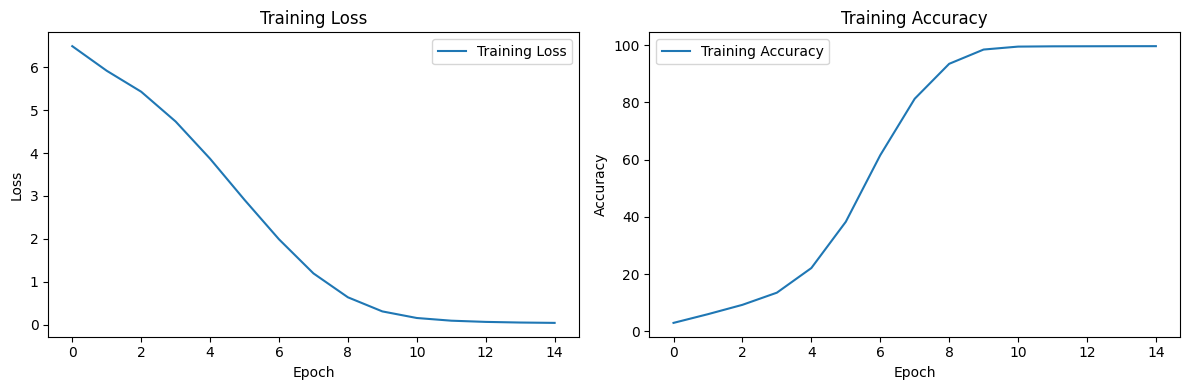

In [4]:
import matplotlib.pyplot as plt
# Visualize the losses and accuracies
plt.figure(figsize=(12, 4))

# Plot losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot accuracies
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [5]:
def predict(model, text, word_to_idx, idx_to_word, sequence_length, num_words=10):
    model.eval()
    words = preprocess_text(text)
    for _ in range(num_words):
        sequence = [word_to_idx.get(w, 0) for w in words[-sequence_length:]]
        sequence = torch.tensor(sequence).unsqueeze(0)
        with torch.no_grad():
            output = model(sequence)
            _, predicted_idx = torch.max(output, 1)
            predicted_word = idx_to_word[predicted_idx.item()]
            words.append(predicted_word)
        print(' '.join(words))

text = "bee"


predict(model, text, word_to_idx, idx_to_word, sequence_length, 30)

bee law
bee law blood
bee law blood guy
bee law blood guy you
bee law blood guy you dont
bee law blood guy you dont know
bee law blood guy you dont know what
bee law blood guy you dont know what hes
bee law blood guy you dont know what hes capable
bee law blood guy you dont know what hes capable of
bee law blood guy you dont know what hes capable of feeling
bee law blood guy you dont know what hes capable of feeling my
bee law blood guy you dont know what hes capable of feeling my brochure
bee law blood guy you dont know what hes capable of feeling my brochure there
bee law blood guy you dont know what hes capable of feeling my brochure there you
bee law blood guy you dont know what hes capable of feeling my brochure there you go
bee law blood guy you dont know what hes capable of feeling my brochure there you go little
bee law blood guy you dont know what hes capable of feeling my brochure there you go little guy
bee law blood guy you dont know what hes capable of feeling my brochure 